**DATA LOADING AND CLEANING**

In [1]:
from google.colab import files
uploaded = files.upload()

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
dataset_path = "Maternal Health Risk Data Set.csv"
df = pd.read_csv(dataset_path)

# Display the first few rows
print("\nDataset Preview:")
(df.head())

Saving Maternal Health Risk Data Set.csv to Maternal Health Risk Data Set.csv

Dataset Preview:


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [3]:
# Dataset information
print("Dataset Information:")
df.info()

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)

# Summary statistics of the dataset
print("\nSummary Statistics:")
df.describe()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB

Missing Values:
Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

Summary Statistics:


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [4]:
# Check the class distribution
df['RiskLevel'].value_counts()

,count
RiskLevel,
low risk,406
mid risk,336
high risk,272


There seems to be data imbalance and we'll handle it later using some technique.

In [5]:
# Encode the categorical variable to numerical values as follows: High risk-2, mid risk-1, low risk- 0
df["RiskLevel"] = df["RiskLevel"].replace({"high risk": 2, "mid risk": 1, "low risk": 0})

# Display table with encoded values
df.head()

<ipython-input-5-d12a738ae8b4>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["RiskLevel"] = df["RiskLevel"].replace({"high risk": 2, "mid risk": 1, "low risk": 0})


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,2
1,35,140,90,13.0,98.0,70,2
2,29,90,70,8.0,100.0,80,2
3,30,140,85,7.0,98.0,70,2
4,35,120,60,6.1,98.0,76,0


**VISUALIZATIONS IMPLEMENTED**

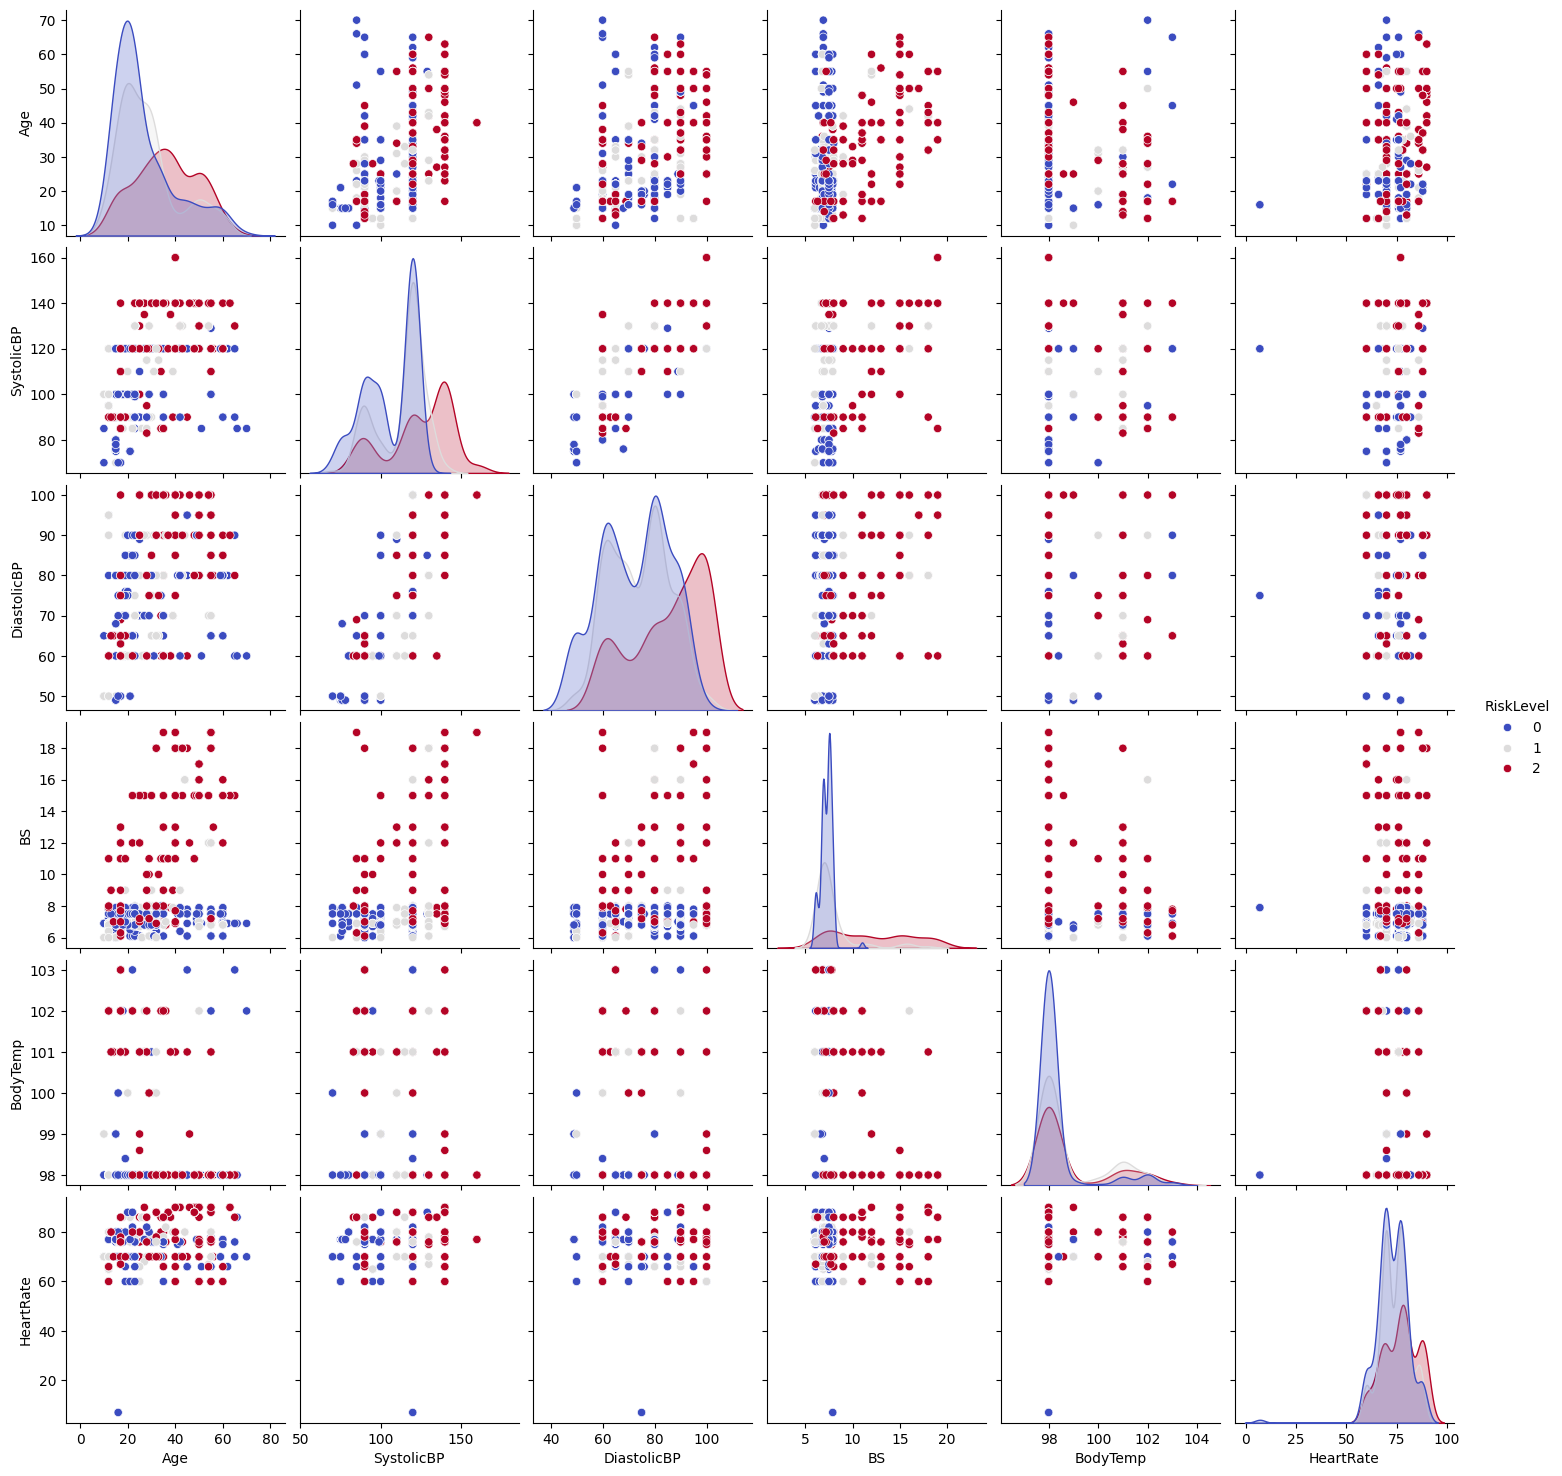

In [7]:
# Using pairplot to explore relationships between features
sns.pairplot(df, hue = "RiskLevel", palette = "coolwarm", diag_kind = "kde", height = 2.5)
plt.show()

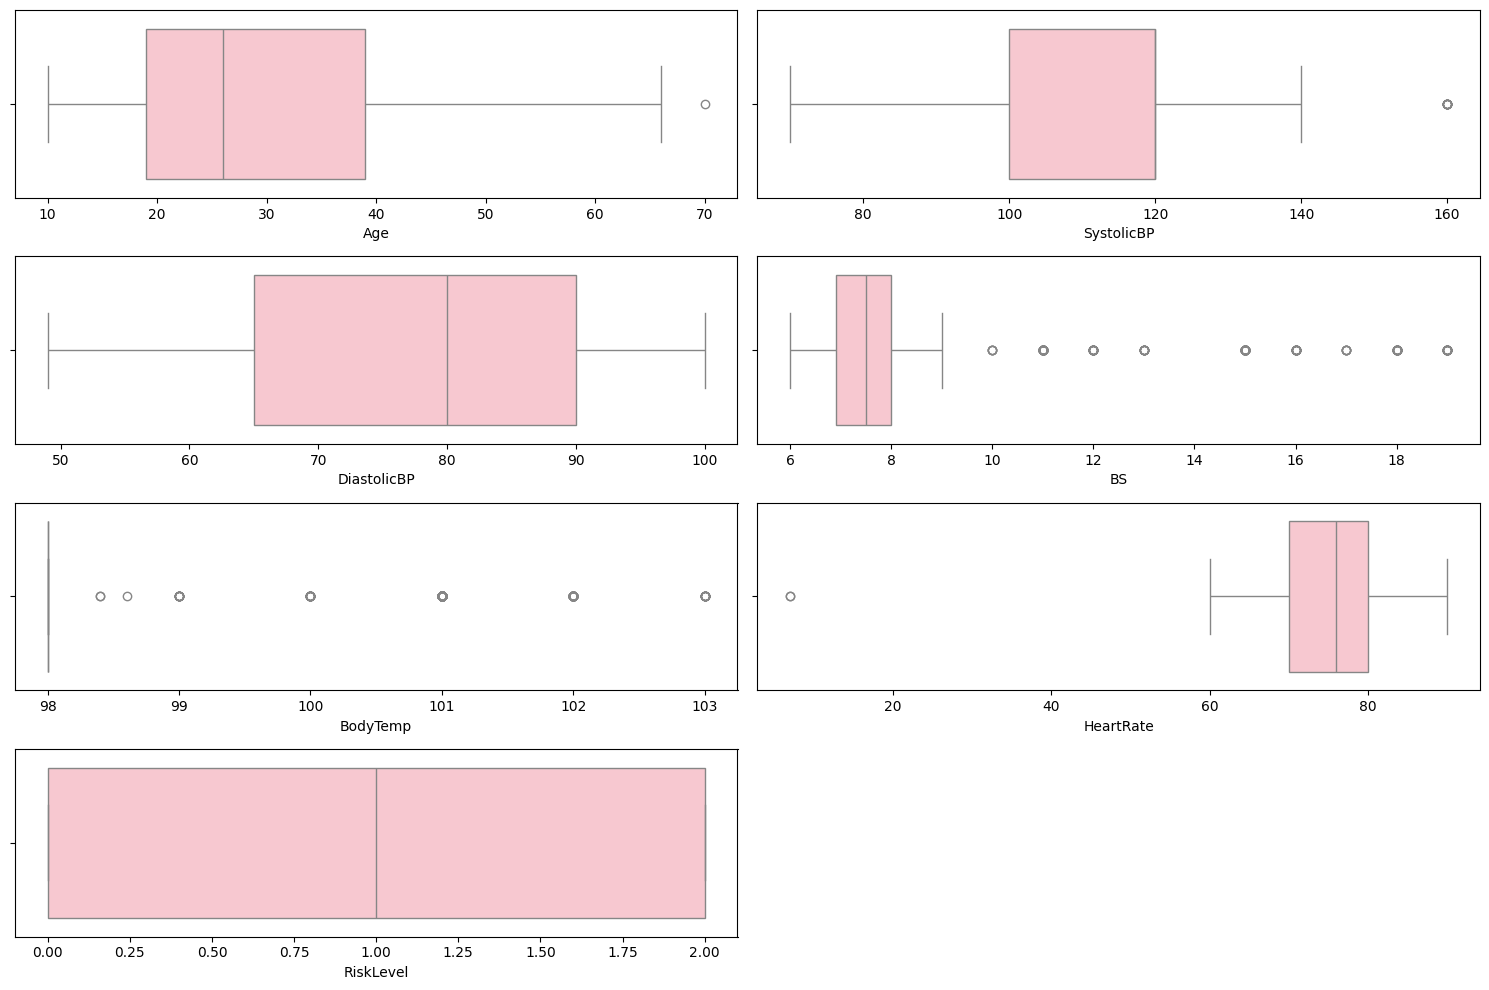

In [8]:
# Using boxplots to visualize outliers for each feature
plt.figure(figsize = (15, 10))
num_cols = len(df.columns)
num_rows = (num_cols + 1) // 2
for i, column in enumerate(df.columns, 1):
    plt.subplot(num_rows, 2, i)
    sns.boxplot(x = df[column], color = 'pink')
plt.tight_layout()
plt.show()

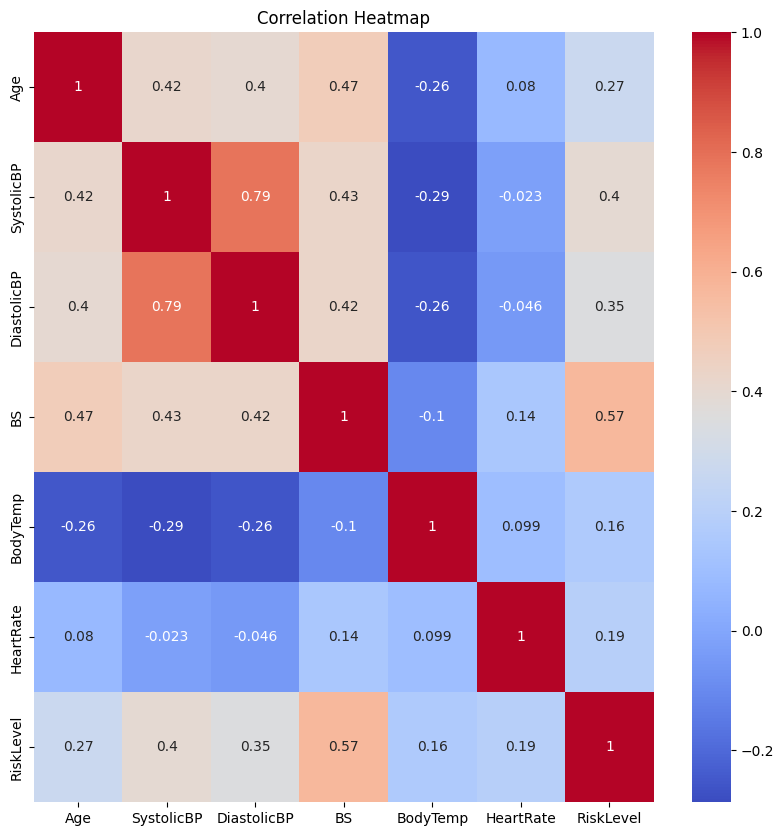

In [11]:
# Using Correlation heatmap to see the relations among all features
correlation_matrix = df.corr()
plt.figure(figsize = (10, 10))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

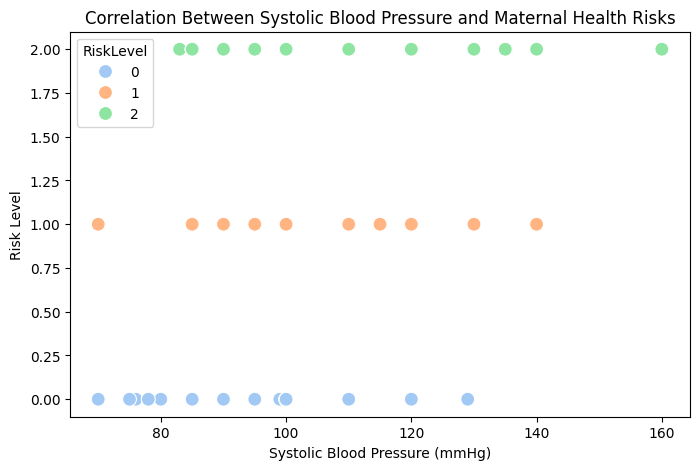

In [10]:
# Scatter to show relation between Blood Pressure and the associated risks.
plt.figure(figsize = (8, 5))
sns.scatterplot(data = df, x = 'SystolicBP', y = 'RiskLevel', hue = 'RiskLevel', palette = 'pastel', s = 100)
plt.title('Correlation Between Systolic Blood Pressure and Maternal Health Risks')
plt.xlabel('Systolic Blood Pressure (mmHg)')
plt.ylabel('Risk Level')
plt.show()

* Patients with higher systolic blood pressure values (above 110 mmHg) are predominantly in the high-risk category.
* Mid-risk patients mostly fall within the systolic blood pressure range of 85–130 mmHg.
* Low-risk patients tend to have systolic blood pressure under 100 mmHg indicating normal BP levels.

<ipython-input-13-dedddd0accf5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'RiskLevel', y = 'BS', palette = 'bright')


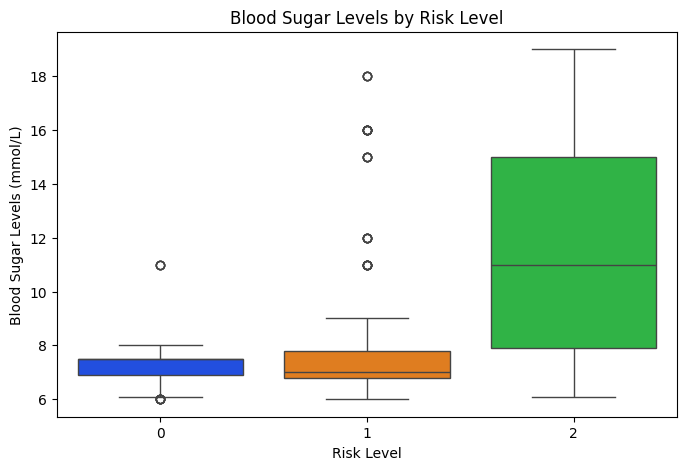

In [13]:
# Boxplot to visualize blood sugar levels by risk level
plt.figure(figsize = (8, 5))
sns.boxplot(data = df, x = 'RiskLevel', y = 'BS', palette = 'bright')
plt.title('Blood Sugar Levels by Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('Blood Sugar Levels (mmol/L)')
plt.show()

* High-risk patients have a significantly higher spread of blood sugar levels, with the median around 12 mmol/L and outliers exceeding 18 mmol/L.
* Low-risk patients have tightly clustered blood sugar levels, typically under 7 mmol/L.
* Mid-risk patients show moderate blood sugar levels, ranging mostly between 7 and 10 mmol/L.

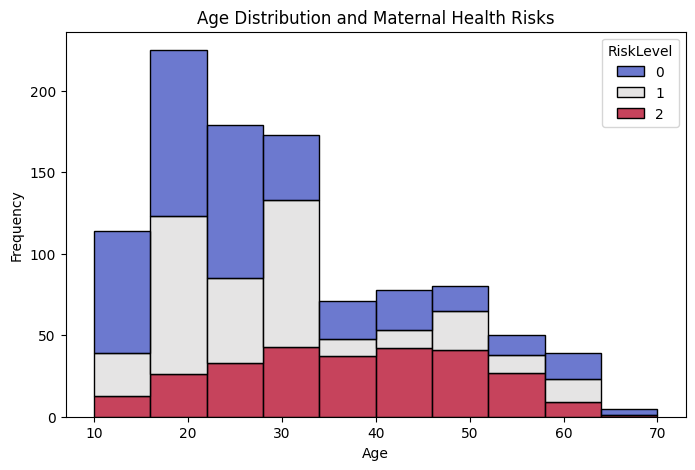

In [14]:
# Plotting histogram to show age distribution between different risks
plt.figure(figsize = (8, 5))
sns.histplot(data = df, x = 'Age', hue = 'RiskLevel', multiple = 'stack', bins = 10, palette = 'coolwarm')
plt.title('Age Distribution and Maternal Health Risks')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

* Younger mothers (10–30) have the lowest risks, but risks escalate with age beyond 30, possibly due to complications associated with older pregnancies.

**DATA PREPROCESSING**

In [15]:
# Handle outliers by capping with the IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df.copy()

# Cap the outliers
for column in df.columns:
    lower_bound = Q1[column] - 1.5 * IQR[column]
    upper_bound = Q3[column] + 1.5 * IQR[column]
    df_no_outliers[column] = np.where(df[column] < lower_bound, lower_bound, df_no_outliers[column])
    df_no_outliers[column] = np.where(df[column] > upper_bound, upper_bound, df_no_outliers[column])

# Inspect the dataset after handling outliers
print("\nDataset after handling outliers:")
df_no_outliers.describe()


Dataset after handling outliers:


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.0,1014.000000,1014.000000
mean,29.870809,113.099606,76.460552,7.714645,98.0,74.396450,0.867850
std,13.471482,18.178042,13.885796,1.138902,0.0,7.563788,0.807353
min,10.000000,70.000000,49.000000,6.000000,98.0,55.000000,0.000000
25%,19.000000,100.000000,65.000000,6.900000,98.0,70.000000,0.000000
50%,26.000000,120.000000,80.000000,7.500000,98.0,76.000000,1.000000
75%,39.000000,120.000000,90.000000,8.000000,98.0,80.000000,2.000000
max,69.000000,150.000000,100.000000,9.650000,98.0,90.000000,2.000000


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df_no_outliers.drop('RiskLevel', axis = 1)
y = df_no_outliers['RiskLevel']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

# Further split training set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42, stratify = y_train)

# Check the shapes of the splits
print("\nTraining Set Shape:", X_train.shape)
print("Validation Set Shape:", X_val.shape)
print("Test Set Shape:", X_test.shape)


Training Set Shape: (648, 6)
Validation Set Shape: (163, 6)
Test Set Shape: (203, 6)


In [19]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# We mentioned data imbalance earlier. We'll use SMOTE to handle it
smote = SMOTE(sampling_strategy = {0: 406}, random_state = 42)  # Adjusting class 0 to have 406 samples
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution after resampling
print("\nClass distribution after SMOTE resampling:")
pd.Series(y_train_resampled).value_counts()


Class distribution after SMOTE resampling:


,count
RiskLevel,
0.0,406
1.0,215
2.0,173


In [20]:
from sklearn.preprocessing import StandardScaler

# Scale the features using StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)

# Transform validation and test data
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Check the scaled data shapes
print("\nScaled Data Shapes:")
print("Training Data:", X_train_resampled_scaled.shape)
print("Validation Data:", X_val_scaled.shape)
print("Test Data:", X_test_scaled.shape)


Scaled Data Shapes:
Training Data: (794, 6)
Validation Data: (163, 6)
Test Data: (203, 6)


**SAVING MY TRAIN AND TEST DATA**

In [23]:
import pandas as pd

# Convert numpy arrays back to DataFrame
X_train_scaled_df = pd.DataFrame(X_train_resampled_scaled, columns = X_train_resampled.columns)
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns = X_val.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns = X_test.columns)

# Save as CSV files
X_train_scaled_df.to_csv('X_train_scaled.csv', index = False)
X_val_scaled_df.to_csv('X_val_scaled.csv', index = False)
X_test_scaled_df.to_csv('X_test_scaled.csv', index = False)
y_train.to_csv('y_train.csv', index = False)
y_val.to_csv('y_val.csv', index = False)
y_test.to_csv('y_test.csv', index = False)

print("Data is saved successfully!")

Data is saved successfully!


**BUILDING MODEL - RANDOM FOREST CLASSIFIER**


Model Performance Summary:
Training Accuracy: 0.9395
Validation Accuracy: 0.8528
Test Accuracy: 0.8325

Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.83      0.84        81
         1.0       0.80      0.76      0.78        67
         2.0       0.85      0.93      0.89        55

    accuracy                           0.83       203
   macro avg       0.83      0.84      0.83       203
weighted avg       0.83      0.83      0.83       203



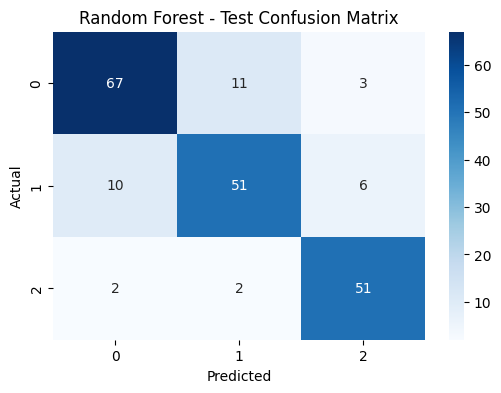

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report

# Initialize the RandomForestClassifier model
model = RandomForestClassifier(n_estimators = 100, random_state = 42)

# Train the model using the resampled and scaled training data
model.fit(X_train_resampled_scaled, y_train_resampled)

# Predictions for Validation and Test Sets
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)

# Evaluate Performance
train_accuracy = accuracy_score(y_train_resampled, model.predict(X_train_resampled_scaled))
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print Model Performance Summary
print("\nModel Performance Summary:")
print("Training Accuracy: {:.4f}".format(train_accuracy))
print("Validation Accuracy: {:.4f}".format(val_accuracy))
print("Test Accuracy: {:.4f}".format(test_accuracy))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_test_pred, zero_division = 1))

# Confusion Matrix for Test Set
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(test_confusion_matrix, annot = True, fmt = "d", cmap = "Blues")
plt.title("Random Forest - Test Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**SAVING AND TESTING MY MODEL**

In [25]:
import joblib

# Save the trained RandomForest model
joblib.dump(model, "random_forest_maternal_health.pkl")

# Save the scaler separately (if you used one)
joblib.dump(scaler, "scaler.pkl")

print("RandomForest model and scaler saved successfully!")

RandomForest model and scaler saved successfully!


In [27]:
import numpy as np
import pandas as pd
import joblib

# Loads the trained model and scaler.
def load_model(model_path = "random_forest_maternal_health.pkl", scaler_path = "scaler.pkl"):
    model = joblib.load(model_path)
    scaler = joblib.load(scaler_path)
    print("Model and scaler loaded successfully!")
    return model, scaler
# Prediction- takes a raw input sample, applies scaling, and predicts the risk level.
def make_prediction(model, scaler, sample):
    feature_names = ["Age", "SystolicBP", "DiastolicBP", "BS", "BodyTemp", "HeartRate"]

    # Convert input list to DataFrame
    sample_df = pd.DataFrame([sample], columns = feature_names)

    # Apply scaling
    sample_scaled = scaler.transform(sample_df)

    # Make prediction
    predicted_risk_numeric = model.predict(sample_scaled)[0]

    # Convert numerical prediction to label
    risk_mapping = {0: "low risk", 1: "mid risk", 2: "high risk"}
    predicted_risk_label = risk_mapping[predicted_risk_numeric]

    return predicted_risk_label

if __name__ == "__main__":
    # Load model and scaler
    model, scaler = load_model()

    # Manually input values
    sample = [25, 120, 80, 6.5, 37.5, 75]

    # Make prediction
    predicted_risk = make_prediction(model, scaler, sample)
    print(f"Predicted Risk Level: {predicted_risk}")

Model and scaler loaded successfully!
Predicted Risk Level: low risk
